# Unit 2.3 Hakcs
> Libraries
- toc: true
- comments: true
- categories: [csp, jupyter]
- permalink: /csp/2.3HACks
- tags: [python]
- comments: true

In [2]:
import seaborn as sns

# Load the titanic dataset
tips_data = sns.load_dataset('tips')




tips_data.head(15)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### Anaylzing the data set
- This data set analyzes the amount of tip and includes different variables such as the gender, smoker, day and time, and it also includes the size
- The tip varies with total bill however the other factors may have an impact


In [3]:
df = tips_data

df['sex'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)
# 0 is female and 1 is male
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'Yes' else 0)
# smoker is 1 non smoker is 0
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4


In [4]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['day']])
onehot = enc.transform(df[['day']]).toarray()
cols = ['day_' + val for val in enc.categories_[0]]
df[cols] = pd.DataFrame(onehot)
df.drop(['day'], axis=1, inplace=True)
df.dropna(inplace=True)

In [5]:
df.head()

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,0,0,Dinner,2,0.0,0.0,1.0,0.0
1,10.34,1.66,1,0,Dinner,3,0.0,0.0,1.0,0.0
2,21.01,3.50,1,0,Dinner,3,0.0,0.0,1.0,0.0
3,23.68,3.31,1,0,Dinner,2,0.0,0.0,1.0,0.0
4,24.59,3.61,0,0,Dinner,4,0.0,0.0,1.0,0.0


In [6]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['time']])
onehot = enc.transform(df[['time']]).toarray()
cols = ['time_' + val for val in enc.categories_[0]]
df[cols] = pd.DataFrame(onehot)
df.drop(['time'], axis=1, inplace=True)
df.dropna(inplace=True)

In [7]:
df.head()

,total_bill,tip,sex,smoker,size,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,0,0,2,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,1,0,3,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,1,0,3,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,1,0,2,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,0,0,4,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
print(df.query("tip > 0").mean())

total_bill     19.785943
tip             2.998279
size            2.569672
day_Fri         0.077869
day_Sat         0.356557
day_Sun         0.311475
day_Thur        0.254098
time_Dinner     0.721311
time_Lunch      0.278689
dtype: float64


/tmp/ipykernel_12057/703362537.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.query("tip > 0").mean())


In [9]:
print("max for male")
print()
print(df.query("sex == 1").max())
print()
print("min for male")
print()
print(df.query("sex == 1").min())

max for male

total_bill     50.81
tip            10.00
size            6.00
day_Fri         1.00
day_Sat         1.00
day_Sun         1.00
day_Thur        1.00
time_Dinner     1.00
time_Lunch      1.00
dtype: float64

min for male

total_bill     7.25
tip            1.00
size           1.00
day_Fri        0.00
day_Sat        0.00
day_Sun        0.00
day_Thur       0.00
time_Dinner    0.00
time_Lunch     0.00
dtype: float64


/tmp/ipykernel_12057/1846147331.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.query("sex == 1").max())
/tmp/ipykernel_12057/1846147331.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.query("sex == 1").min())


In [10]:
df.head()
df['tip_ratio'] = df['tip'] / df['total_bill']
df.head()

df.drop(['total_bill'], axis=1, inplace=True)

df.head()

,tip,sex,smoker,size,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,tip_ratio
0,1.01,0,0,2,0.0,0.0,1.0,0.0,1.0,0.0,0.059447
1,1.66,1,0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.160542
2,3.50,1,0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.166587
3,3.31,1,0,2,0.0,0.0,1.0,0.0,1.0,0.0,0.139780
4,3.61,0,0,4,0.0,0.0,1.0,0.0,1.0,0.0,0.146808


In [11]:
df.drop(['tip'], axis=1, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split arrays or matrices into random train and test subsets.
X = df.drop('tip_ratio', axis=1)
y = df['tip_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model performance using the R-squared metric
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.011258186111395396


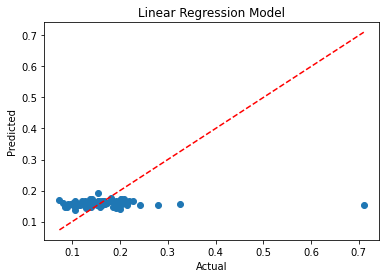

In [16]:
import matplotlib.pyplot as plt


plt.scatter(y_test, y_pred)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')


plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Model')
plt.show()


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
model = DecisionTreeRegressor()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model performance using the R-squared metric
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.2670252122501524


In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set and calculate the R-squared score
y_pred = model.predict(X_test)
r2_score = r2_score(y_test, y_pred)
print("R-squared", r2_score)

R-squared -0.011258186111395396
